In [1]:
pip install scipy


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd
import matplotlib.pyplot as plt
from scipy import *
data_train=pd.read_csv('data/sign_mnist_train/sign_mnist_train.csv')
data_test=pd.read_csv('data/sign_mnist_test/sign_mnist_test.csv')

In [4]:
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [30]:
data_train.shape

(27455, 785)

In [29]:
data_test.shape

(7172, 785)

In [5]:
#Get only pixels from the dataframe
training_images = data_train.iloc[:,1:].values
#Get only the label
training_labels = data_train.iloc[:,0].values

#Get only the pixels of the test data
testing_images = data_test.iloc[:,1:].values

#
testing_labels = data_test.iloc[:,0].values

training_images = training_images.reshape(-1,28,28,1)
testing_images = testing_images.reshape(-1,28,28,1)


print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28, 1)
(27455,)
(7172, 28, 28, 1)
(7172,)


/var/folders/jf/mqbx9rpj7cz6qz4vjk7f1n4c0000gn/T/ipykernel_78081/2030074488.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


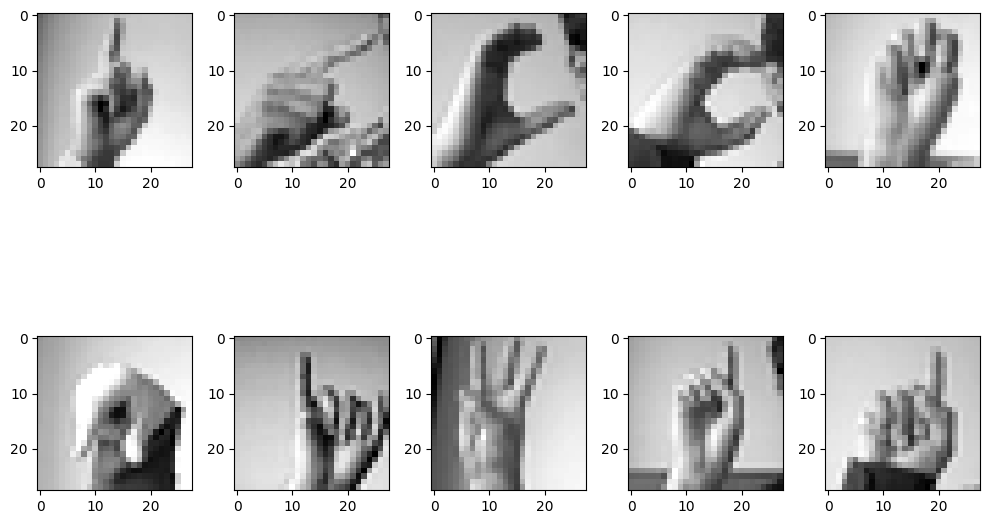

In [6]:
fig, ax = plt.subplots(2,5) 
fig.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(training_images[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

In [7]:
# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    #rescale pixels to be from 0-1
    rescale=1. / 255,
    #image can be rotated up to 40 degrees
    rotation_range=40,
    #Images can be horizontally/vertically shifted up to 20% of their dimensions
    width_shift_range=0.2,
    height_shift_range=0.2,
    #
    shear_range=0.2,
    #image can be zoomed in up to 20%
    zoom_range=0.2,
    #Images can be horizontally flipped
    horizontal_flip=True,
    # filling in newly created pixels resulting from transformations is set to 
    # 'nearest', which means the nearest valid pixel will be used.
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1 / 255
)
    
# Verify dimensions have stayed the
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [8]:
#Sequential Neural Network Model
model = tf.keras.models.Sequential([
    #32 filters with 3x3 dim, input of 28x28 image grayscale channel(1)
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    #2x2 max pooling layer
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Flattens output from revious layers into 1D array for dense layers
    tf.keras.layers.Flatten(),
    #512 neurons and ReLU activation to spot complex relationships in data
    tf.keras.layers.Dense(512, activation='relu'),
    #26 neurons for the 26 classes(alphabet) classifications
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile Model. 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=20,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)



model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/10


/var/folders/jf/mqbx9rpj7cz6qz4vjk7f1n4c0000gn/T/ipykernel_78081/3785433612.py:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),


857/857 [==============================] - 5s 6ms/step - loss: 2.6449 - accuracy: 0.1941 - val_loss: 1.6803 - val_accuracy: 0.4575
Epoch 2/10
857/857 [==============================] - 5s 6ms/step - loss: 1.8193 - accuracy: 0.4169 - val_loss: 1.2735 - val_accuracy: 0.5548
Epoch 3/10
857/857 [==============================] - 5s 6ms/step - loss: 1.4140 - accuracy: 0.5339 - val_loss: 0.8535 - val_accuracy: 0.6764
Epoch 4/10
857/857 [==============================] - 5s 6ms/step - loss: 1.1470 - accuracy: 0.6188 - val_loss: 0.6787 - val_accuracy: 0.7444
Epoch 5/10
857/857 [==============================] - 5s 6ms/step - loss: 0.9683 - accuracy: 0.6763 - val_loss: 0.6228 - val_accuracy: 0.7692
Epoch 6/10
857/857 [==============================] - 5s 6ms/step - loss: 0.8483 - accuracy: 0.7171 - val_loss: 0.4653 - val_accuracy: 0.8260
Epoch 7/10
857/857 [==============================] - 5s 6ms/step - loss: 0.7475 - accuracy: 0.7515 - val_loss: 0.5019 - val_accuracy: 0.8185
Epoch 8/10
857/85

[92.94210052490234, 0.7696598172187805]

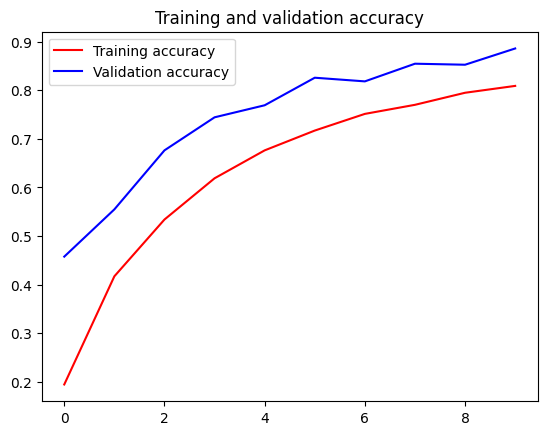

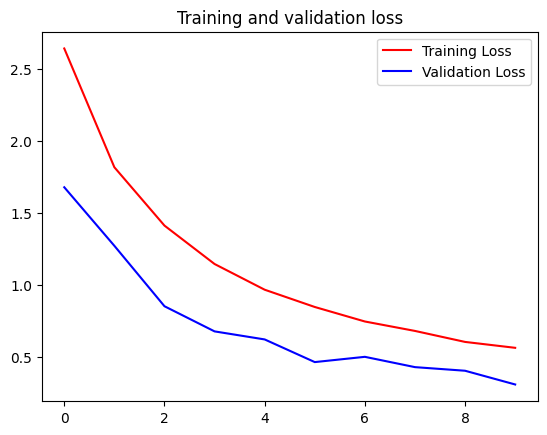

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

In [26]:
print(history)

In [27]:

mean_acc = sum(history.history['accuracy'])/ len(history.history['accuracy'])
print('Accuracy score: {}'.format(mean_acc))



Accuracy score: 0.6283045008778572
